# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [101]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import analytic

import thinkstats2
import thinkplot

## Exponential distribution

Here's what the exponential CDF looks like with a range of parameters.

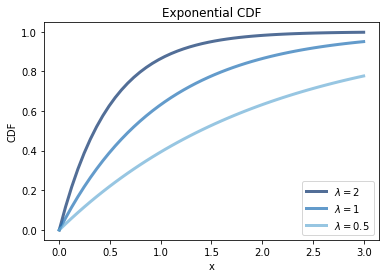

In [102]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='x', ylabel='CDF', 
                 loc='lower right')

In [103]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

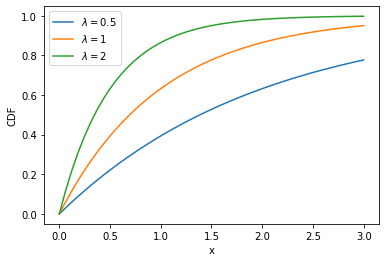

In [104]:
# Mine
fig,ax = plt.subplots(1,1)

xs = np.linspace(0.0, 3.0, 50)

for lam in [0.5,1.0,2.0]:
    label = r'$\lambda=%g$' % lam
    ax.plot(xs, stats.expon.cdf(xs, scale=1/lam), label=label)

ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.legend()

plt.show()

Here's the distribution of interarrival times from a dataset of birth times.

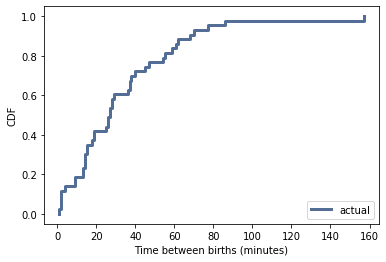

In [105]:
df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Time between births (minutes)', ylabel='CDF')

In [106]:
# Mine
diffs = diffs.drop(0).sort_values().reset_index(drop=True)

In [107]:
val1, cnt1 = np.unique(diffs, return_counts=True)

rv1 = stats.rv_discrete(values=(val1,cnt1/sum(cnt1)))

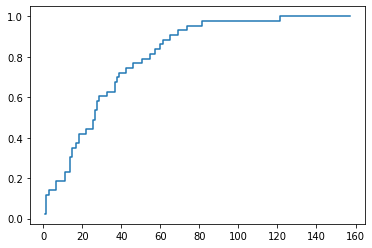

In [108]:
fig,ax = plt.subplots(1,1)

ax.step(val1, rv1.cdf(val1), where='mid')

Here's what the CCDF looks like on a log-y scale.  A straight line is consistent with an exponential distribution.

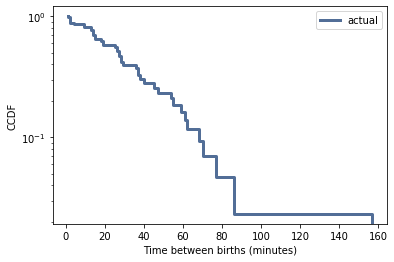

In [109]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Time between births (minutes)',
                 ylabel='CCDF', yscale='log', loc='upper right')

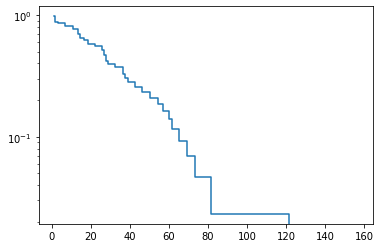

In [110]:
# Mine, need to use .sf for the complement (CCDF)
fig,ax = plt.subplots(1,1)

ax.step(val1, rv1.sf(val1), where='mid')

plt.yscale('log')

plt.show()

## Normal distribution

Here's what the normal CDF looks like with a range of parameters.

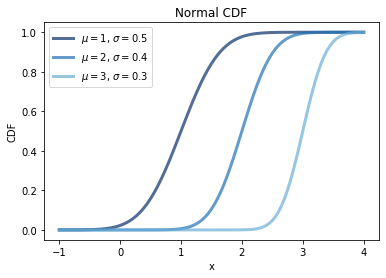

In [111]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

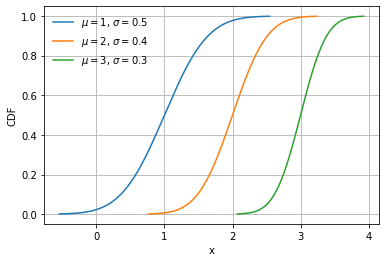

In [112]:
# Mine

fig,ax = plt.subplots(1,1)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    my_xs = np.linspace(stats.norm.ppf(0.001, loc=mu, scale=sigma), stats.norm.ppf(0.999, loc=mu, scale=sigma), 1000)
    my_ps = stats.norm.cdf(my_xs, loc=mu, scale=sigma)
    
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    
    ax.plot(my_xs, my_ps, label=label)

ax.legend(frameon=False)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.grid()

plt.show()

I'll use a normal model to fit the distribution of birth weights from the NSFG.

In [113]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

Here's the observed CDF and the model.  The model fits the data well except in the left tail.

Mean, Var 7.280883100022579 1.545212570354489
Sigma 1.243065794861434


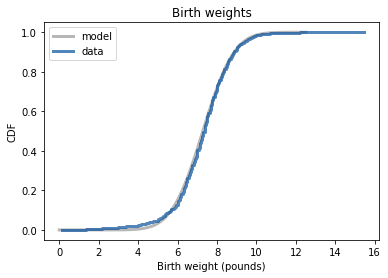

In [114]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(weights, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Birth weights',
                 xlabel='Birth weight (pounds)',
                 ylabel='CDF')

mean = 7.265628457623368
std deviation = 1.4082934455690173


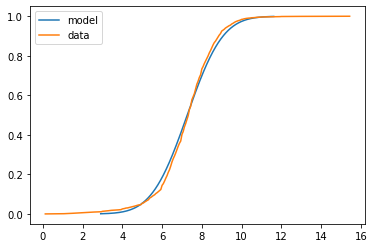

In [115]:
# Mine
# Compute mean and standard deviation
my_mu = stats.tmean(weights)
my_std = stats.tstd(weights)
print('mean =', my_mu)
print('std deviation =', my_std)

# Plot the model
fig,ax = plt.subplots(1,1)

my_norm_rv = stats.norm(loc=my_mu, scale=my_std)
my_norm_xs = np.linspace(my_norm_rv.ppf(0.001), my_norm_rv.ppf(0.999), 1000)
my_norm_ps = my_norm_rv.cdf(my_norm_xs)

ax.plot(my_norm_xs, my_norm_ps, label='model')

# Plot the data
val2,cnt2 = np.unique(weights, return_counts=True)
my_data_rv = stats.rv_discrete(values=(val2,cnt2/sum(cnt2)))

ax.plot(my_data_rv.xk, my_data_rv.cdf(my_data_rv.xk), label='data')
ax.legend()

plt.show()

A normal probability plot is a visual test for normality.  The following example shows that if the data are actually from a normal distribution, the plot is approximately straight.

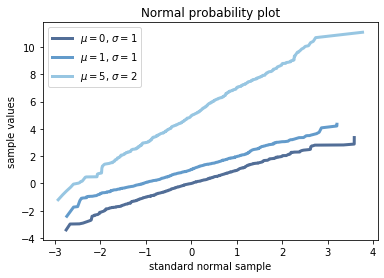

In [116]:
n = 1000
thinkplot.PrePlot(3) 

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample',
                 ylabel='sample values')

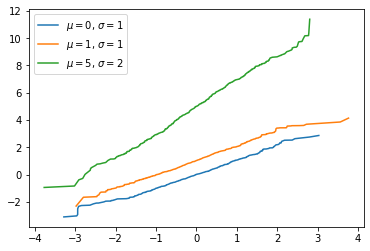

In [117]:
# Mine, this takes a sample from distribution models, but in a real case you would use the sorted data
# This is the kind of shape the plot should have if it fits a normal distribution
n = 1000
fig,ax = plt.subplots(1,1)

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu,sigma in zip(mus,sigmas):
    my_sample = sorted(np.random.normal(mu, sigma, n))
    my_snorm_sample = sorted(np.random.normal(0,1,n))
    label = r'$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    ax.plot(my_snorm_sample, my_sample, label=label)

ax.legend()
plt.show()

Here's the normal probability plot for birth weights, showing that the lightest babies are lighter than we expect from the normal mode, and the heaviest babies are heavier.

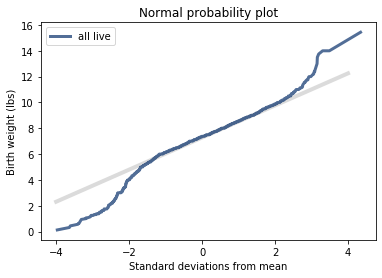

In [118]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label='all live')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')

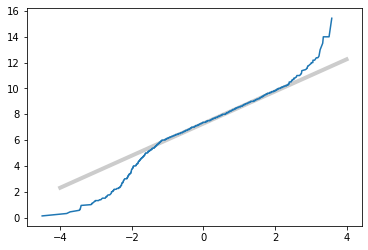

In [119]:
# Mine, this time I just use the book's fitline points and as well mean and std
# The mean and std are calculated from the weights data and then used to make the fitline (see above)

fig,ax = plt.subplots(1,1)

ax.plot(fxs, fys, linewidth=4, color='0.8')

data_sorted = sorted(weights) # sort the values in the data
snorm_sample_sorted = sorted(np.random.normal(0,1,len(weights))) # generate a sorted sample from the std normal dist with same length as the data set

ax.plot(snorm_sample_sorted, data_sorted) # plot the std normal sample (x) vs the data (y) with the fitline

plt.show()

If we suspect that the deviation in the left tail is due to preterm babies, we can check by selecting only full term births.

In [120]:
full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

Now the deviation in the left tail is almost gone, but the heaviest babies are still heavy.

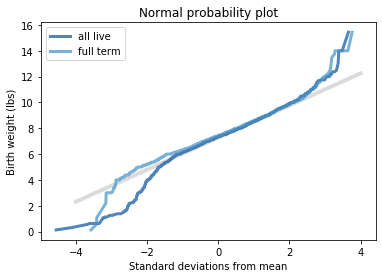

In [121]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(2) 
xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label='all live')

xs, ys = thinkstats2.NormalProbability(term_weights)
thinkplot.Plot(xs, ys, label='full term')
thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')

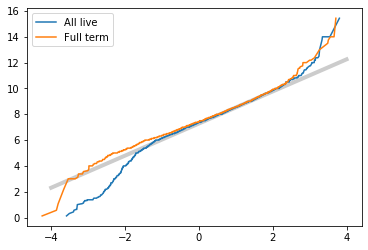

In [122]:
# Mine, this time all just use the book's fitline points and as well mean and std
# The mean and std are calculated from the weights data and then used to make the fitline (see above)

fig,ax = plt.subplots(1,1)

ax.plot(fxs, fys, linewidth=4, color='0.8')

live_data_sorted = sorted(weights) # sort the values in the data (all live)
live_snorm_sample_sorted = sorted(np.random.normal(0,1,len(weights))) # generate a sorted sample from the std normal dist with same length as the data set

ax.plot(live_snorm_sample_sorted, live_data_sorted, label='All live') # plot the std normal sample (x) vs the data (y) with the fitline

term_data_sorted = sorted(term_weights) # sort the values in the data (full-term)
term_snorm_sample_sorted = sorted(np.random.normal(0,1,len(term_weights))) # generate a sorted sample from the std normal dist with same length as the data set

ax.plot(term_snorm_sample_sorted, term_data_sorted, label='Full term') # plot the std normal sample (x) vs the data (y) with the fitline

ax.legend()
plt.show()

## Lognormal model

As an example of a lognormal disrtribution, we'll look at adult weights from the BRFSS.

In [123]:
import brfss
df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

The following function estimates the parameters of a normal distribution and plots the data and a normal model.

In [124]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='weights')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

Here's the distribution of adult weights and a normal model, which is not a very good fit.

n, mean, std 398484 78.59599565702814 17.754555191797277


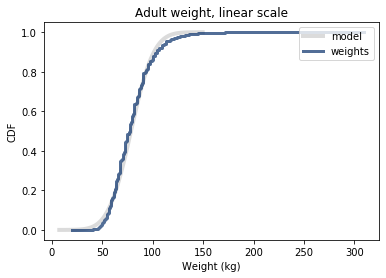

In [125]:
MakeNormalModel(weights)
thinkplot.Config(title='Adult weight, linear scale', xlabel='Weight (kg)',
                 ylabel='CDF', loc='upper right')

n = 398484   mean = 78.99245299687198   std =  19.546156913066667


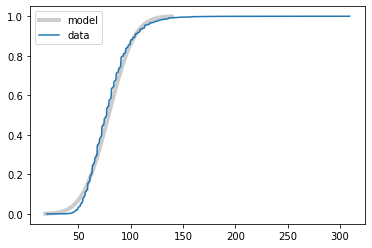

In [126]:
# Mine, without using trimmed mean and std

print('n =', len(weights), '  mean =', weights.mean(), '  std = ', weights.std())

# Create data rv
w_val,w_cnt = np.unique(weights, return_counts=True)
w_rv = stats.rv_discrete(values=(w_val, w_cnt/sum(w_cnt)))

# Create model data
w_norm_rv = stats.norm(loc=weights.mean(), scale=weights.std())
w_xs = np.linspace(w_norm_rv.ppf(0.001), w_norm_rv.ppf(0.999), 1000)
w_ps = w_norm_rv.cdf(w_xs)

# Plot model
fig,ax = plt.subplots(1,1)

ax.plot(w_xs, w_ps, label='model', linewidth=4, color='0.8')

# Plot data
ax.plot(w_rv.xk, w_rv.cdf(w_rv.xk), label='data')

ax.legend()

plt.show()

In [127]:
# Checking out how weights and log weights look different
weights.describe()

count    398484.000000
mean         78.992453
std          19.546157
min          20.000000
25%          64.550000
50%          77.270000
75%          90.910000
max         309.090000
Name: wtkg2, dtype: float64

In [128]:
my_log_weights = np.log10(weights)
my_log_weights.describe()

count    398484.000000
mean          1.885117
std           0.103265
min           1.301030
25%           1.809896
50%           1.888011
75%           1.958612
max           2.490085
Name: wtkg2, dtype: float64

In [129]:
# Try out some logs to get a feel for it
np.log10(500)

2.6989700043360187

Here's the distribution of adult weight and a lognormal model, plotted on a log-x scale.  The model is a better fit for the data, although the heaviest people are heavier than the model expects.

n, mean, std 398484 1.884660713731975 0.09623580259150845


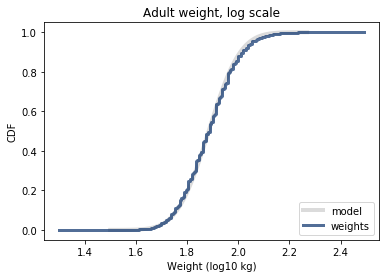

In [130]:
log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(title='Adult weight, log scale', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='lower right')

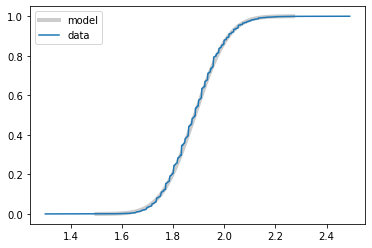

In [131]:
# Mine, using log_weights from above
lw_mean = log_weights.mean()
lw_std = log_weights.std()

# Create model rv
lw_rv = stats.norm(loc=lw_mean, scale=lw_std)

# Generate model values, can stretch out the tails by increasing the numbers in linspace below
lwm_xs = np.linspace(lw_rv.ppf(0.0001), lw_rv.ppf(0.9999), 10000)
lwm_ps = lw_rv.cdf(lwm_xs)

# Plot model
fig,ax = plt.subplots(1,1)

ax.plot(lwm_xs, lwm_ps, label='model', linewidth=4, color='0.8')

# Generate data values and create data rv
lwd_xs, lwd_ps = np.unique(log_weights, return_counts=True)
lwd_rv = stats.rv_discrete(values=(lwd_xs, lwd_ps/sum(lwd_ps)))

# Plot data
ax.plot(lwd_rv.xk, lwd_rv.cdf(lwd_rv.xk), label='data')

ax.legend()

plt.show()

The following function generates a normal probability plot.

In [132]:
def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='weights')

When we generate a normal probability plot with adult weights, we can see clearly that the data deviate from the model systematically.

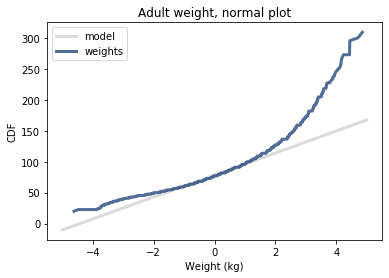

In [133]:
MakeNormalPlot(weights)
thinkplot.Config(title='Adult weight, normal plot', xlabel='Weight (kg)',
                 ylabel='CDF', loc='upper left')

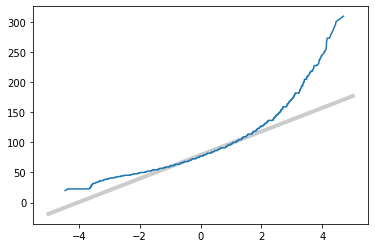

In [134]:
# Mine

# get trimming limits, not working, the limits parameter uses values, so need to index into the data to get that
# to_subtract = round(len(weights)*.01)
# lower_lim=to_subtract
# upper_lim=len(weights)-to_subtract

# find trimmed mean and std, just using full data because trimming not working yet, see above
w_mean = stats.tmean(weights)
w_std = stats.tstd(weights)

# Make fitline
fxs = np.sort([-5,5]) # sort and change to array for vectorized multiplication
fys = w_mean + w_std*fxs

fig,ax = plt.subplots()

ax.plot(fxs, fys, linewidth=4, color='0.8')

# Generate values for normal probability and plot it

w_sorted_norm = sorted(np.random.normal(0,1,len(weights)))
w_sorted_data = sorted(weights)

ax.plot(w_sorted_norm, w_sorted_data)

plt.show()

If we make a normal probability plot with log weights, the model fit the data well except in the tails, where the heaviest people exceed expectations.

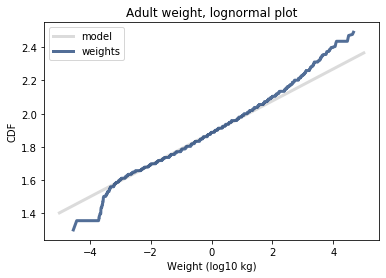

In [135]:
MakeNormalPlot(log_weights)
thinkplot.Config(title='Adult weight, lognormal plot', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='upper left')

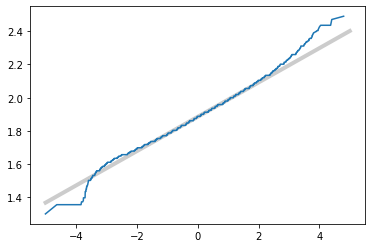

In [136]:
# Mine, use same code as above just substitute log data

wl_mean = stats.tmean(log_weights)
wl_std = stats.tstd(log_weights)

# Make fitline
fxs = np.sort([-5,5]) # sort and change to array for vectorized multiplication
fys = wl_mean + wl_std*fxs

fig,ax = plt.subplots(1,1)

ax.plot(fxs, fys, linewidth=4, color='0.8')

# Generate values for normal probability and plot it

wl_sorted_norm = sorted(np.random.normal(0,1,len(log_weights)))
wl_sorted_data = sorted(log_weights)

ax.plot(wl_sorted_norm, wl_sorted_data)

plt.show()

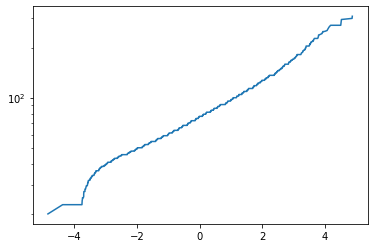

In [137]:
# Just to try, is plotting log of the data, the same as just using a log scale?
# Shape does appear to be the same, but not exactly in the tails

fig,ax = plt.subplots(1,1)

wl_sorted_norm = sorted(np.random.normal(0,1,len(weights)))
wl_sorted_data = sorted(weights)

ax.plot(wl_sorted_norm, wl_sorted_data)

ax.set_yscale('log')

plt.show()

## Pareto distribution

Here's what the Pareto CDF looks like with a range of parameters.

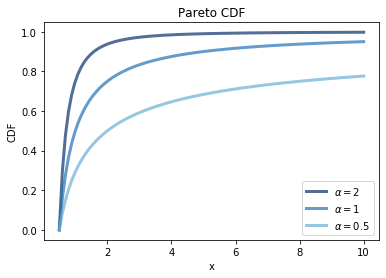

In [138]:
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
    thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

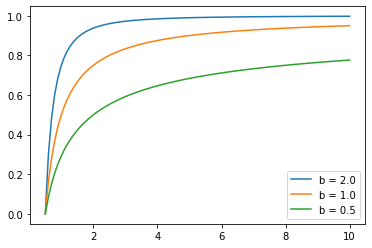

In [139]:
# Mine, I'm using b instead of alpha as that's what is used in scipy docs, accoring to comment in book's code these are equivalent
# It wasn't working out because I was using pareto ppf to build x values but the book used 0 to 10
# Fixed that and now working
fig,ax = plt.subplots() 

xmin=0.5
bs = [2.0, 1.0, 0.5]

for b in bs:
    xs = np.linspace(xmin, 10, 100)
    ps = stats.pareto.cdf(xs, scale=xmin, b=b)
    label = 'b = {}'.format(b)
    
    ax.plot(xs, ps, label=label)

ax.legend()

plt.show()

The distribution of populations for cities and towns is sometimes said to be Pareto-like.

In [140]:
import populations

pops = populations.ReadData()
print('Number of cities/towns', len(pops))

Number of cities/towns 19515


In [141]:
# Messing around with the pops data
pops.describe()

count    1.951500e+04
mean     1.006056e+04
std      8.175112e+04
min      1.000000e+00
25%      3.660000e+02
50%      1.144000e+03
75%      4.605500e+03
max      8.336697e+06
Name: 7, dtype: float64

In [142]:
pops.nunique()

8012

In [143]:
def MakeDiscreteRv(a):
    """Creates a scipy.stats discrete_rv.

    Arguments:
        a {array-like} -- a single data set, will be flattened if it is not already 1-D

    Returns:
        An instance of scipy.stats discrete_rv representing the input data
    """
    val,cnt = np.unique(a, return_counts=True)
    
    return stats.rv_discrete(values=(val,cnt/sum(cnt)))

In [144]:
prv = MakeDiscreteRv(pops)

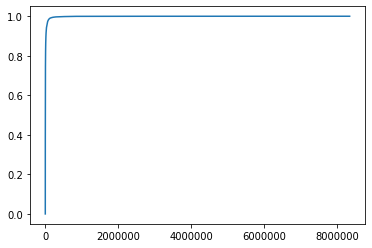

In [145]:
# plot the cdf of the pops data
fig,ax = plt.subplots()

ax.plot(prv.xk, prv.cdf(prv.xk))

In [146]:
np.log10(pops).describe()

count    19515.000000
mean         3.138448
std          0.804164
min          0.000000
25%          2.563481
50%          3.058426
75%          3.663277
max          6.920994
Name: 7, dtype: float64

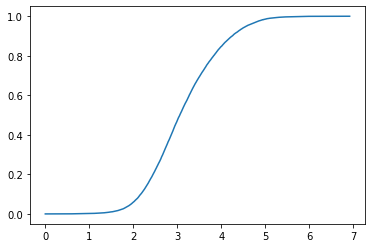

In [147]:
# plot the log of the cdf data, looks to be log-normal
lprv = MakeDiscreteRv(np.log10(pops))

fig,ax = plt.subplots()

ax.plot(lprv.xk, lprv.cdf(lprv.xk))

In [148]:
def NormalProbabilityValues(a):
    """Creates x and y values to be used in a normal probability plot.

    Arguments:
        a {array-like} -- a single input data set

    Returns:
        sorted_norm {list} -- Sorted random data from the standard normal distribution,
        that is the same length as the input data. To be used as x values.

        sorted_data: {list} -- Sorted input data to be used as y values.
    """
    sorted_norm = sorted(np.random.normal(0,1,len(a)))
    sorted_data = sorted(a)
    
    return sorted_norm, sorted_data

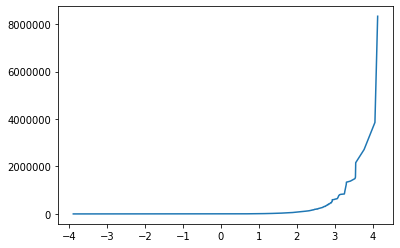

In [149]:
# Try a normal probability plot, doesn't look straight

snorm,sdata = NormalProbabilityValues(pops)

fig,ax = plt.subplots()

ax.plot(snorm, sdata)

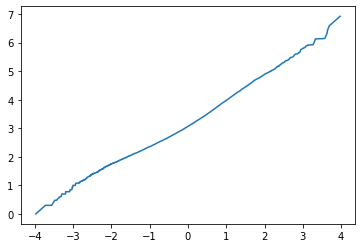

In [150]:
# Try a log-normal probability plot, looks straight

lsnorm,lsdata = NormalProbabilityValues(np.log10(pops))

fig,ax = plt.subplots()

ax.plot(lsnorm, lsdata)

In [151]:
# Try plotting a pareto cdf model of it

def ParetoCdfModelValues(xmin, xmax, b, n=50):
    """Generates sequences of xs and ps for a Pareto CDF.

    Arguments:
        xmin {float} -- The minimum possible value for x
        xmax {float} -- The maximum value for x
        b {float} -- The shape parameter, also referred to as alpha

    Keyword Arguments:
        n {int} -- The number of x values to use (default: {50})

    Returns:
        xs {array} -- The values to use for x in cdf model plot
        ps {array} -- The values to use for y in cdf model plot
    """
    xs = np.linspace(xmin, xmax, n)
    ps = stats.pareto.cdf(xs, scale=xmin, b=b)
    return xs, ps

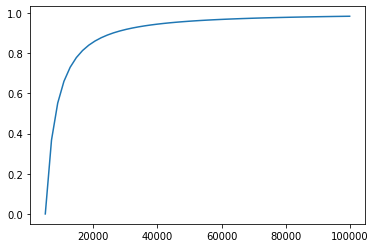

In [152]:
# Had to lower x-max to see the curve at all, just used same alpha used in the book, see below
xs,ps = ParetoCdfModelValues(xmin=5000, xmax=1e5, b=1.4)

fig,ax = plt.subplots()

ax.plot(xs, ps)

Here's the distribution of population for cities and towns in the U.S., along with a Pareto model.  The model fits the data well in the tail.

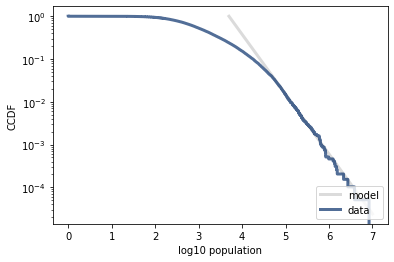

In [153]:
log_pops = np.log10(pops)
cdf = thinkstats2.Cdf(pops, label='data')
cdf_log = thinkstats2.Cdf(log_pops, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log', yloc='lower left')

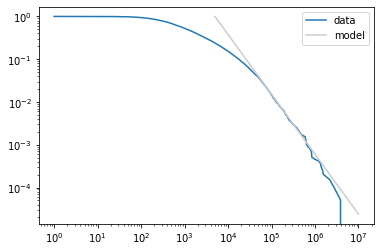

In [154]:
# Mine
# I tried two different ways below: one is to use log x values when creating the rv and only yscale (commented out)
# The other was to make the rv first and then set both to log scales which also works but shows different values on the scales
# So changing the data set values to log and changing the scale to log after plotting seems to yield the same curve
# The survival function works the same regardless which makes sense because it's the same disribution just with different values

# Make the data rv and plot it
# logp_rv = MakeDiscreteRv(np.log10(pops))
p_rv = MakeDiscreteRv(pops)

fig,ax = plt.subplots()

ax.plot(p_rv.xk, p_rv.sf(p_rv.xk), label='data') # Use .sf for the complement (CCDF)

# Make the pareto model line
pmxs, pmys = ParetoCdfModelValues(xmin=5000, xmax=1e7, b=1.4)

ax.plot(pmxs, 1-pmys, label='model', color='0.8')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.show()

The lognormal model might be a better fit for this data (as is often the case for things that are supposed to be Pareto).

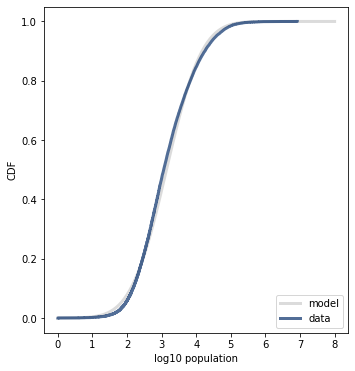

In [155]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CDF', loc='lower right')

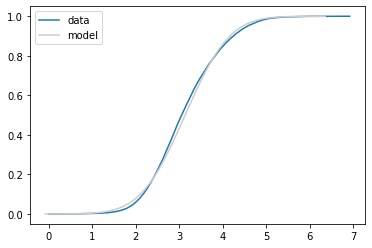

In [156]:
# Mine, also started doing this above already but without model plots

# Data rv and plot
lprv2 = MakeDiscreteRv(np.log10(pops))

fig,ax = plt.subplots()

ax.plot(lprv2.xk, lprv2.cdf(lprv2.xk), label='data')

# Model plot
lpmu = np.log10(pops).mean()
lpsigma = np.log10(pops).std()

xmin = lpmu - 4 * lpsigma
xmax = lpmu + 4 * lpsigma
lpxs = np.linspace(xmin, xmax, 1001)
lpps = stats.norm.cdf(lpxs, loc=lpmu, scale=lpsigma)

ax.plot(lpxs, lpps, label='model', color='0.8')

ax.legend()

plt.show()

Here's a normal probability plot for the log-populations.  The model fits the data well except in the right tail, where the biggest cities are bigger than expected.

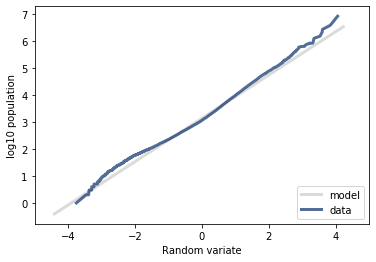

In [157]:
thinkstats2.NormalProbabilityPlot(log_pops, label='data')
thinkplot.Config(xlabel='Random variate',
                 ylabel='log10 population',
                 xlim=[-5, 5])

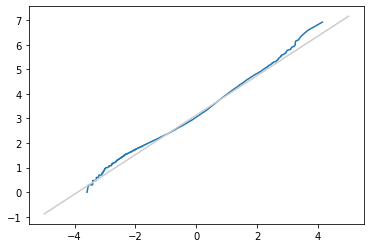

In [158]:
# Mine

# Plot the data
lpsnorm,lpsdata = NormalProbabilityValues(np.log10(pops))

fig,ax = plt.subplots()

ax.plot(lpsnorm, lpsdata, label='data')

# Plot model
lp2mu = np.log10(pops).mean()
lp2sigma = np.log10(pops).std()

fit_lp2xs = np.array([-5, 5])
fit_lp2ys = lp2mu + lp2sigma * fit_lp2xs

ax.plot(fit_lp2xs, fit_lp2ys, label='model', color='0.8')

## Random variates

When we have an analytic CDF, we can sometimes invert it to generate random values.  The following function generates values from an exponential distribution.

In [159]:
import random

def expovariate(lam):
    p = random.random()
    x = -np.log(1-p) / lam
    return x

We can test it by generating a sample.

In [160]:
t = [expovariate(lam=2) for _ in range(1000)]

And plotting the CCDF on a log-y scale.

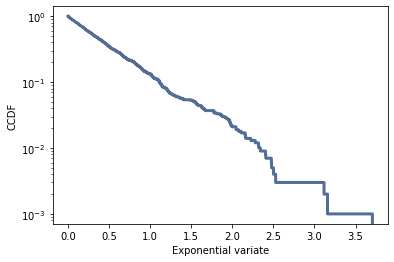

In [161]:
cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Exponential variate', ylabel='CCDF', yscale='log')

A straight line is consistent with an exponential distribution.

As an exercise, write a function that generates a Pareto variate.

In [162]:
# Mine, after doing algebra to solve for x in pareto cdf equation given in the book, value returned is x
def ParetoVariate(xmin, alpha):
    b = 1/alpha
    p = random.random()
    return xmin/((1-p)**b)

In [163]:
# Generate values
t = [ParetoVariate(xmin=1, alpha=1.4) for _ in range(1000)]

In [164]:
# Create rv
pvrv = MakeDiscreteRv(t)

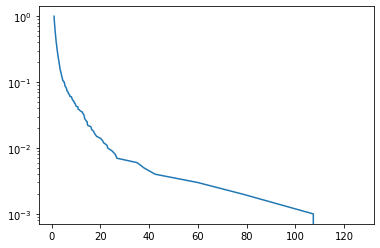

In [165]:
# Not very straight so not sure if this is working...
fig,ax = plt.subplots()

ax.plot(pvrv.xk, pvrv.sf(pvrv.xk))

ax.set_yscale('log')

plt.show()

In [166]:
# There is also a random.pareto function in the random standard library
t2 = [random.paretovariate(alpha=1.4) for _ in range(1000)]
pvrv2 = MakeDiscreteRv(t2)

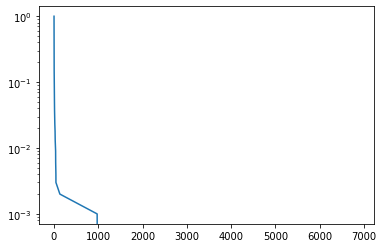

In [167]:
# This is generating similar plots so I think what I was doing was right
# Checked the source code of the random.paretovariate and the equation I used in my function is correct
fig,ax = plt.subplots()

ax.plot(pvrv2.xk, pvrv2.sf(pvrv2.xk))

ax.set_yscale('log')

plt.show()

## Exercises

**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [168]:
import scipy.stats

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [169]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

A "frozen random variable" can compute its mean and standard deviation.

In [170]:
dist.mean(), dist.std()

(178.0, 7.7)

It can also evaluate its CDF.  How many people are more than one standard deviation below the mean?  About 16%

In [171]:
dist.cdf(mu-sigma)

0.1586552539314574

How many people are between 5'10" and 6'1"?

In [172]:
# Solution goes here
# Heights in cm are 177.8 and 185.4
diff = dist.cdf(185.4) - dist.cdf(177.8)
diff

0.3420946829459531

**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [173]:
alpha = 1.7
xmin = 1       # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

What is the mean height in Pareto world?

In [174]:
# Solution goes here
dist.mean()

2.428571428571429

What fraction of people are shorter than the mean?

In [175]:
# Solution goes here
dist.cdf(dist.mean())

0.778739697565288

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [176]:
# Solution goes here
dist.sf(1000)* 7e9

55602.97643069972

How tall do we expect the tallest person to be?

In [177]:
# Solution goes here
dist.ppf(.99999999)
# Really no solution, infinite

50802.180318972154

In [178]:
# Book suggests using one in 7 billion to find the tallest person which assumes that as the world population
dist.ppf(1-1/7e9)

618349.6106759505

**Exercise:** The Weibull distribution is a generalization of the exponential distribution that comes up in failure analysis (see http://wikipedia.org/wiki/Weibull_distribution). Its CDF is

$\mathrm{CDF}(x) = 1 − \exp[−(x / λ)^k]$ 

Can you find a transformation that makes a Weibull distribution look like a straight line? What do the slope and intercept of the line indicate?

Use `random.weibullvariate` to generate a sample from a Weibull distribution and use it to test your transformation.

Generate a sample from a Weibull distribution and plot it using a transform that makes a Weibull distribution look like a straight line.

`thinkplot.Cdf` provides a transform that makes the CDF of a Weibull distribution look like a straight line.

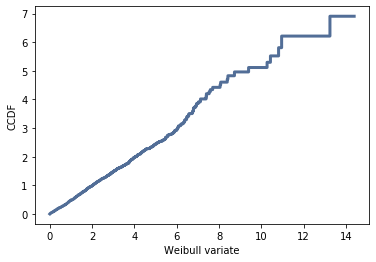

In [179]:
sample = [random.weibullvariate(2, 1) for _ in range(1000)]
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf, transform='weibull')
thinkplot.Config(xlabel='Weibull variate', ylabel='CCDF')

In [180]:
import math

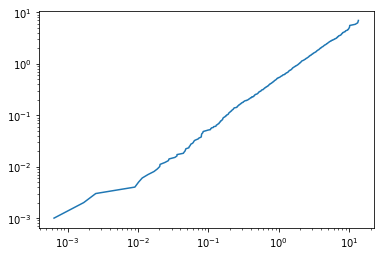

In [181]:
# I think I've got it working, code for transform comes from thinkplot cdf
# It's the natural log of the ccdf, and then the log of both sides to get a linear relationship

my_sample = [random.weibullvariate(2, 1) for _ in range(1000)]
my_wrv = MakeDiscreteRv(my_sample)

fig,ax = plt.subplots()

my_xs = np.delete(my_wrv.xk, -1)
my_ps = np.delete(my_wrv.cdf(my_wrv.xk), -1)

my_logps = [-math.log(1.0-p) for p in my_ps]

ax.plot(my_xs, my_logps)

ax.set_xscale('log')
ax.set_yscale('log')

**Exercise:** For small values of `n`, we don’t expect an empirical distribution to fit an analytic distribution exactly. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

For example, in Section 5.1 we plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is based on only 44 data points. To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

Plot the distribution of the random values and compare it to the actual distribution. You can use random.expovariate to generate the values.

In [182]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

n = len(diffs)
lam = 44.0 / 24 / 60
sample = [random.expovariate(lam) for _ in range(n)]

1/lam, np.mean(sample)

(32.72727272727273, 40.367789070236775)

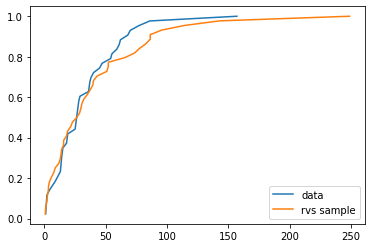

In [183]:
# Solution goes here
# This seems to have worked, since neither sets are actually 'models' I'm using the discrete rv for both: one is the actual data, the other is random variates generated from a 'model'
# The fit is actually fairly good too considering the small number of data points
diffs = diffs.drop(0).sort_values().reset_index(drop=True)

# Plot the data
ex_rv = MakeDiscreteRv(diffs)

fig,ax = plt.subplots()

ax.plot(ex_rv.xk, ex_rv.cdf(ex_rv.xk), label='data')

# Plot the random variate sample
# sample_s = pd.Series(sample)

ex_srv = MakeDiscreteRv(sample)

ax.plot(ex_srv.xk, ex_srv.cdf(ex_srv.xk), label='rvs sample')

ax.legend()

plt.show()

**Worked Example:** The distributions of wealth and income are sometimes modeled using lognormal and Pareto distributions. To see which is better, let’s look at some data.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc.py`, which reads this file.

Extract the distribution of incomes from this dataset. Are any of the analytic distributions in this chapter a good model of the data?

In [184]:
import hinc
df = hinc.ReadData()
df

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640
5,29999.0,6740,36943,0.301679
6,34999.0,6354,43297,0.353566
7,39999.0,5832,49129,0.401191
8,44999.0,5547,54676,0.446488
9,49999.0,5254,59930,0.489392


Here's what the CDF looks like on a linear scale.

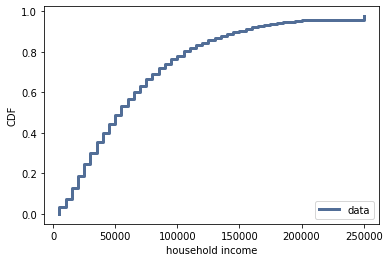

In [185]:
xs, ps = df.income.values, df.ps.values
cdf = thinkstats2.Cdf(xs, ps, label='data')
cdf_log = thinkstats2.Cdf(np.log10(xs), ps, label='data')
    
# linear plot
thinkplot.Cdf(cdf) 
thinkplot.Config(xlabel='household income',
                   ylabel='CDF')

To check whether a Pareto model describes the data well, I plot the CCDF on a log-log scale.

I found parameters for the Pareto model that match the tail of the distribution.

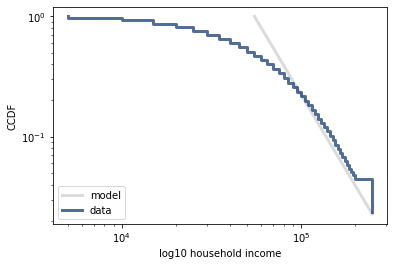

In [186]:
xs, ys = thinkstats2.RenderParetoCdf(xmin=55000, alpha=2.5, 
                                     low=0, high=250000)

thinkplot.Plot(xs, 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf, complement=True) 
thinkplot.Config(xlabel='log10 household income',
                 ylabel='CCDF',
                 xscale='log',
                 yscale='log', 
                 loc='lower left')

For the lognormal model I estimate mu and sigma using percentile-based statistics (median and IQR).

In [187]:
median = cdf_log.Percentile(50)
iqr = cdf_log.Percentile(75) - cdf_log.Percentile(25)
std = iqr / 1.349

# choose std to match the upper tail
std = 0.35
print(median, std)

4.740354793159152 0.35


In [188]:
# Just curious what the mean and std are, have to drop the inf value to get them
np.delete(np.log10(df.income.values), -1).mean(), np.delete(np.log10(df.income.values), -1).std()

(4.908975899255759, 0.37794666904750446)

Here's what the distribution, and fitted model, look like on a log-x scale.

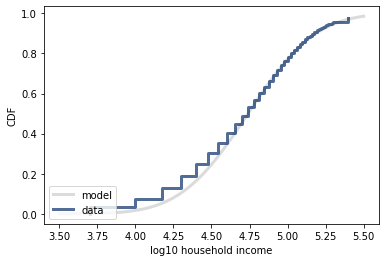

In [189]:
xs, ps = thinkstats2.RenderNormalCdf(median, std, low=3.5, high=5.5)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 household income',
                 ylabel='CDF')

My conclusions based on these figures are:

1) The Pareto model might be a reasonable choice for the top
   10-20% of incomes.

2) The lognormal model captures the shape of the distribution better,
   with some deviation in the left tail.  With different
   choices for sigma, you could match the upper or lower tail, but not
   both at the same time.
 
In summary I would say that neither model captures the whole distribution,
so you might have to 

1) look for another analytic model, 

2) choose one that captures the part of the distribution that is most 
   relevent, or 

3) avoid using an analytic model altogether.

In [190]:
# Messing around with variate generators, the scipy and random module methods seem to do the same thing
normrv = stats.norm(loc=3, scale=2.3)

In [191]:
normrv.rvs(size=10)

array([ 4.72598353,  3.3216499 ,  1.40583891,  5.19447859,  6.87472948,
       -0.60222896,  5.33485459, -2.56354052,  7.15750332,  2.78371828])

In [192]:
random.normalvariate(mu=3, sigma=2.3)

5.776772712267804

In [193]:
# Is plotting the log of x values the same as plotting the x values and changing the x scale to log?
# Tried this in lognormal section above, check there
# This does result in the same curve but the numbers that appear on the scale are different.

In [194]:
# Build an exponential cdf values generator using code from models above

def ExponentialCdfValues(xmin, xmax, lam, n=50):
    xs = np.linspace(xmin, xmax, n)
    ps = stats.expon.cdf(xs, scale=1/lam)
    return xs,ps

In [195]:
zxs,zps = ExponentialCdfValues(0,3,2)

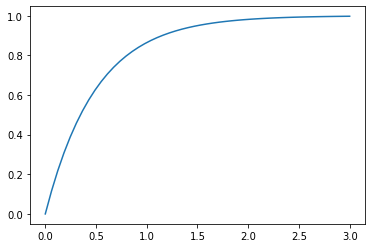

In [196]:
fig,ax = plt.subplots()

ax.plot(zxs,zps)